In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [72]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [74]:
df.shape

(381109, 12)

In [75]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [76]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df["Response"].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

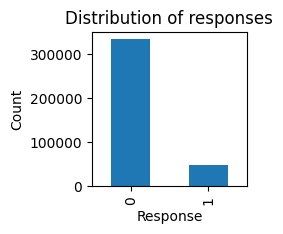

In [78]:
value_count = df["Response"].value_counts()
plt.figure(figsize = (2,2))
value_count.plot(kind = "bar")
plt.xlabel('Response')
plt.ylabel('Count')
plt.title("Distribution of responses")

plt.show()



<Axes: >

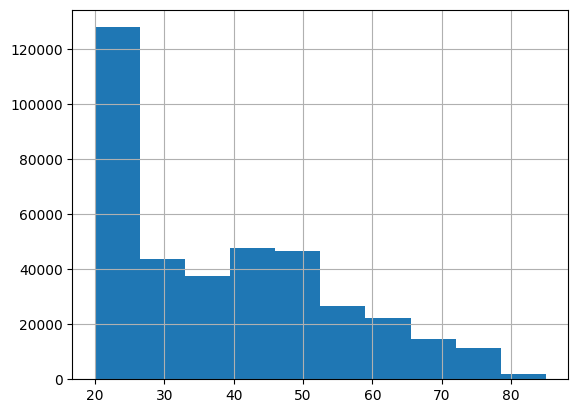

In [79]:
df["Age"].hist(bins = 10)

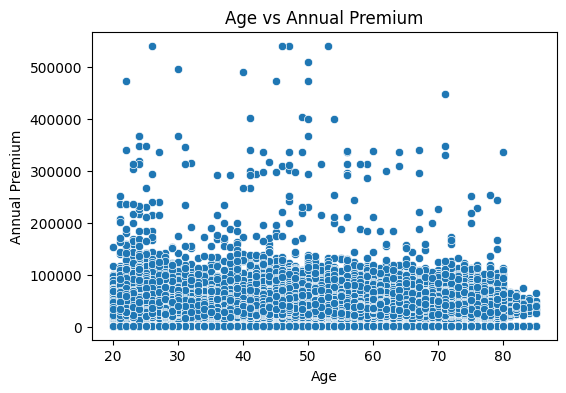

In [80]:
plt.figure(figsize = (6 , 4))
sns.scatterplot(x = "Age" , y = "Annual_Premium" , data = df)
plt.xlabel("Age")
plt.ylabel("Annual Premium")
plt.title("Age vs Annual Premium")
plt.show()


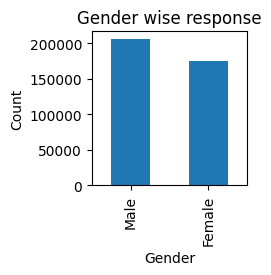

In [81]:
# gender response comparirion
value_counts = df["Gender"].value_counts()

plt.figure(figsize = (2,2))
value_counts.plot(kind = "bar")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender wise response")
plt.show()

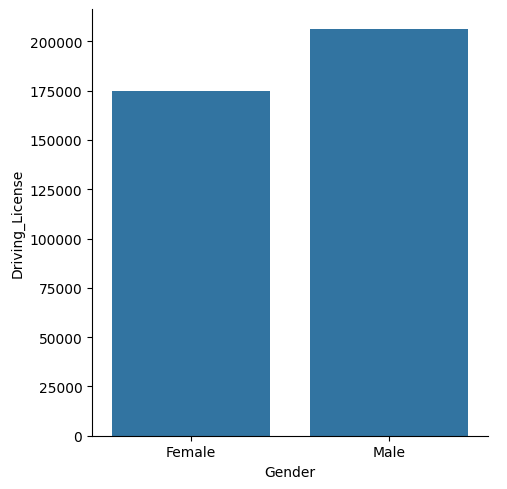

In [82]:
# driving license by gender

data=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License", data=data, kind="bar");

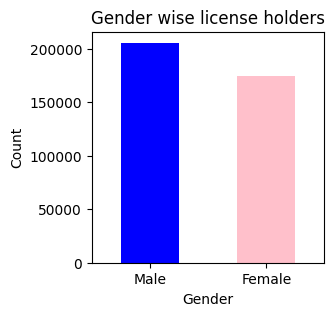

In [83]:
license_holders = df[df["Driving_License"] == 1]
gender_counts = license_holders["Gender"].value_counts()

plt.figure(figsize = (3,3))
gender_counts.plot(kind = "bar" , color = ['blue' , 'pink'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender wise license holders")
plt.xticks(rotation = 0)
plt.show()

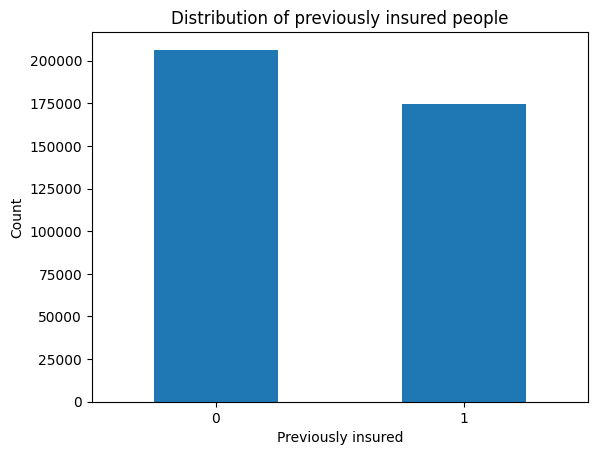

In [84]:
counts = df["Previously_Insured"].value_counts()
counts.plot(kind = "bar")
plt.xlabel("Previously insured")
plt.ylabel("Count")
plt.title("Distribution of previously insured people")
plt.xticks(rotation = 0)
plt.show()



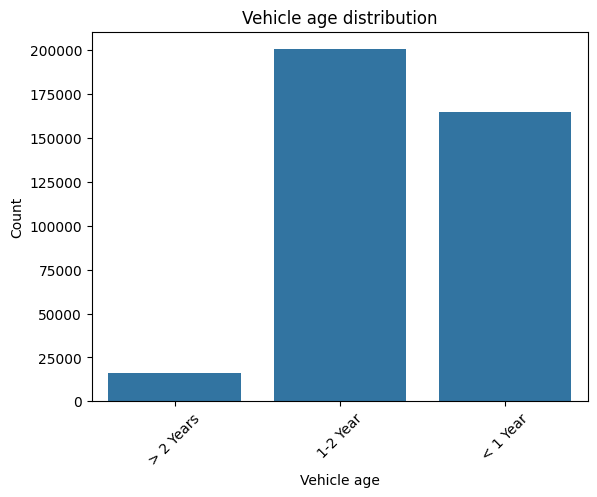

In [85]:
sns.countplot(x = "Vehicle_Age" , data = df)
plt.xlabel("Vehicle age")
plt.ylabel("Count")
plt.title("Vehicle age distribution")
plt.xticks(rotation = 45)
plt.show()

In [86]:
data = df.groupby(["Vehicle_Age" , "Response"])["id"].count().to_frame().rename(columns = {"id" : "count"}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


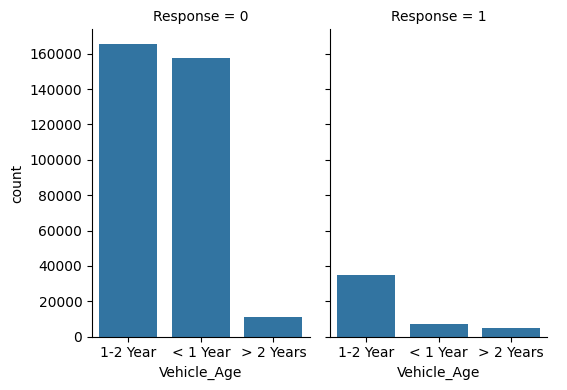

In [87]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=data, kind="bar",
                height=4, aspect=.7);

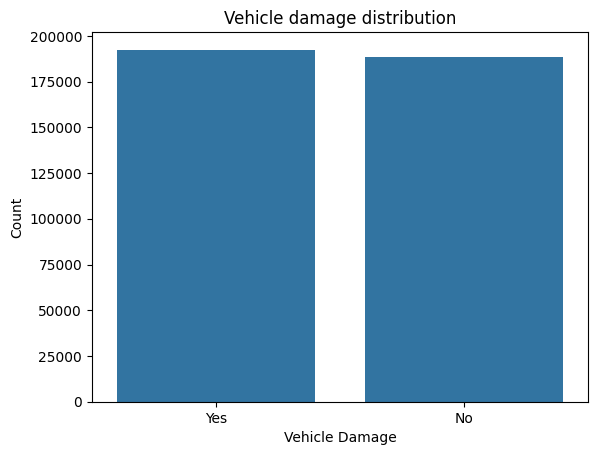

In [88]:
sns.countplot(data = df , x = "Vehicle_Damage")
plt.xlabel("Vehicle Damage")
plt.ylabel("Count")
plt.title("Vehicle damage distribution")
plt.xticks(rotation = 0)
plt.show()


In [89]:
data = df.groupby(["Vehicle_Damage" , "Response"])["id"].count().to_frame().rename(columns = {"id" : "count"}).reset_index()
data

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


In [90]:
df["Annual_Premium"].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [91]:
df[df["Annual_Premium"] > 20000]


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


DATA PREPROCESSING

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [93]:
num_feat = ["Age" , "Vintage"]
cat_feat  = ["Gender" , "Driving_License"  , "Previously_Insured" , "Vehicle_Age_lt1_year" , "Vehicle_Age_gt2_year",
"Vehicle_Damage_Yes" , "Region_Code" , "Policy_Sales_Channel"]

In [94]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 34.9+ MB


In [96]:
#creating dummy cols for categorical features
df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     381109 non-null  int64  
 1   Gender                 381109 non-null  int64  
 2   Age                    381109 non-null  int64  
 3   Driving_License        381109 non-null  int64  
 4   Region_Code            381109 non-null  float64
 5   Previously_Insured     381109 non-null  int64  
 6   Annual_Premium         381109 non-null  float64
 7   Policy_Sales_Channel   381109 non-null  float64
 8   Vintage                381109 non-null  int64  
 9   Response               381109 non-null  int64  
 10  Vehicle_Age_< 1 Year   381109 non-null  bool   
 11  Vehicle_Age_> 2 Years  381109 non-null  bool   
 12  Vehicle_Damage_Yes     381109 non-null  bool   
dtypes: bool(3), float64(3), int64(7)
memory usage: 30.2 MB


In [100]:
df = df.rename(columns = { "Vehicle_Age_< 1 Year" :"Vehicle_Age_lt1_year"  , "Vehicle_Age_> 2 Years": "Vehicle_Age_gt2_year"})
df["Vehicle_Age_lt1_year"]  = df["Vehicle_Age_lt1_year"].astype(int)
df["Vehicle_Age_gt2_year"]  = df["Vehicle_Age_gt2_year"].astype(int)
df["Vehicle_Damage_Yes"]  = df["Vehicle_Damage_Yes"].astype(int)


In [101]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt1_year,Vehicle_Age_gt2_year,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Annual_Premium        381109 non-null  float64
 7   Policy_Sales_Channel  381109 non-null  float64
 8   Vintage               381109 non-null  int64  
 9   Response              381109 non-null  int64  
 10  Vehicle_Age_lt1_year  381109 non-null  int64  
 11  Vehicle_Age_gt2_year  381109 non-null  int64  
 12  Vehicle_Damage_Yes    381109 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 37.8 MB


In [104]:
for column in cat_feat:
    df[column] = df[column].astype('str')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  float64
 2   Driving_License       381109 non-null  object 
 3   Region_Code           381109 non-null  object 
 4   Previously_Insured    381109 non-null  object 
 5   Annual_Premium        381109 non-null  float64
 6   Policy_Sales_Channel  381109 non-null  object 
 7   Vintage               381109 non-null  float64
 8   Response              381109 non-null  int64  
 9   Vehicle_Age_lt1_year  381109 non-null  object 
 10  Vehicle_Age_gt2_year  381109 non-null  object 
 11  Vehicle_Damage_Yes    381109 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 34.9+ MB


In [106]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)

AttributeError: 'DataFrame' object has no attribute 'id'

In [107]:
# train-test split

from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [109]:
train.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt1_year,Vehicle_Age_gt2_year,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [111]:
best_params = model.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'entropy'}


In [112]:
# save model

import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [113]:

rf_load = pickle.load(open(filename, 'rb'))

In [114]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

